In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir= '/content/drive/MyDrive/data'

In [4]:
image_exts = ['jpeg','jpg','bmp','png']


In [5]:
happy_images = os.listdir(os.path.join(data_dir,'happy'))
sad_images = os.listdir(os.path.join(data_dir,'sad'))

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [9]:
for d in data:
  print(d)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.    

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

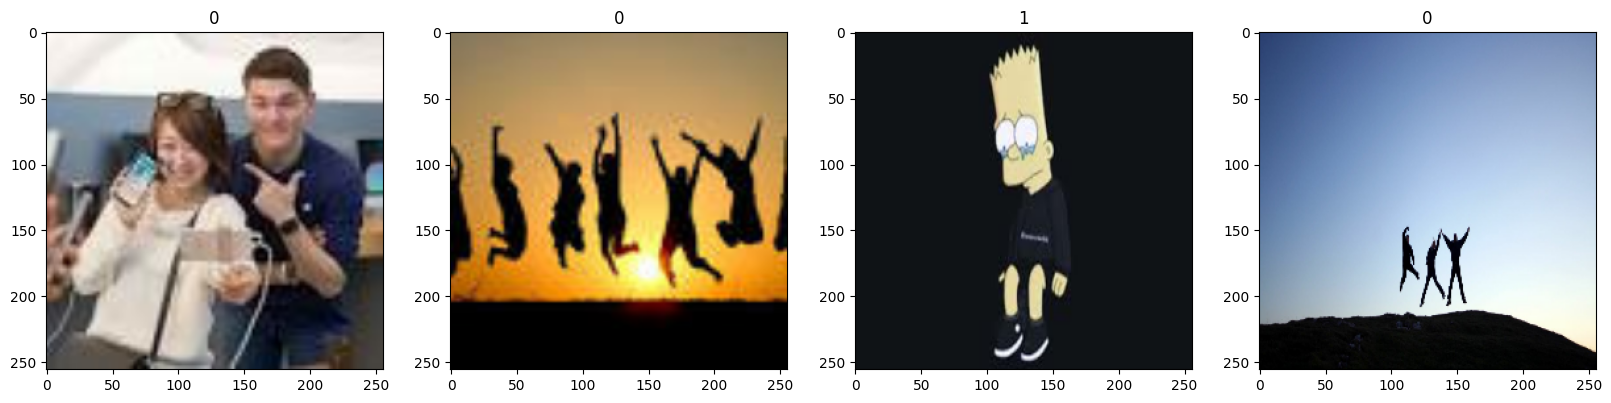

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 1.        , 0.972549  ],
          [0.9764706 , 1.        , 0.972549  ],
          [0.9764706 , 1.        , 0.972549  ],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.9761336 , 1.        , 0.972212  ],
          [0.9761336 , 1.        , 0.972212  ],
          [0.9761336 , 1.        , 0.972212  ],
          ...,
          [0.9928309 , 0.9928309 , 0.9928309 ],
          [0.9928309 , 0.9928309 , 0.9928309 ],
          [0.9928309 , 0.9928309 , 0.9928309 ]],
 
         [[0.9746017 , 1.        , 0.9706801 ],
          [0.9746017 , 1.        , 0.9706801 ],
          [0.9746017 , 1.        , 0.9706801 ],
          ...,
          [0.9958946 , 0.9958946 , 0.9958946 ],
          [0.9958946 , 0.9958946 , 0.9958946 ],
          [0.9958946 , 0.9958946 , 0.9958946 ]],
 
         ...,
 
         [[0.0653799 , 0.07322304, 0.12420343],
          [0.06481

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dense,Flatten,Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
logging = 'logs'
callbacks =  tf.keras.callbacks.TensorBoard(log_dir = logging)

In [25]:
trained = model.fit(train,epochs=20,validation_data=  val,callbacks =[callbacks])

Epoch 1/20
7/7 [==============================] - 18s 545ms/step - loss: 0.7322 - accuracy: 0.5804 - val_loss: 0.6356 - val_accuracy: 0.6719
Epoch 2/20
7/7 [==============================] - 7s 707ms/step - loss: 0.6092 - accuracy: 0.6384 - val_loss: 0.4817 - val_accuracy: 0.8125
Epoch 3/20
7/7 [==============================] - 6s 537ms/step - loss: 0.5600 - accuracy: 0.6920 - val_loss: 0.4685 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 9s 922ms/step - loss: 0.4459 - accuracy: 0.8170 - val_loss: 0.2824 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 6s 545ms/step - loss: 0.3663 - accuracy: 0.8482 - val_loss: 0.3150 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 8s 824ms/step - loss: 0.2888 - accuracy: 0.8884 - val_loss: 0.2434 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 6s 531ms/step - loss: 0.1935 - accuracy: 0.9554 - val_loss: 0.1414 - val_accuracy: 0.9688
Epoch 8/20
7/7 [===

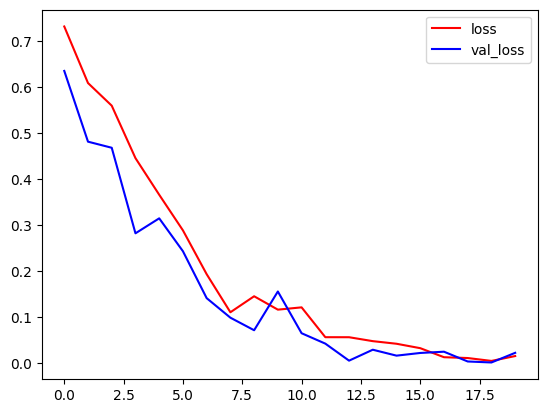

In [28]:
fig = plt.figure()
plt.plot(trained.history['loss'],color='red',label='loss')
plt.plot(trained.history['val_loss'],color='blue',label='val_loss')
plt.legend()
plt.show();